In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#from IPython.display import clear_output

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Anomaly_Data.csv')


#df = pd.read_csv("/Users/kylemaxwell/Desktop/Anomaly_Data.csv")
#df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/premassage.csv')
cleaned = df.drop(columns=['Unnamed: 0'])

In [0]:
cleaned = cleaned[["NORM_UNI_PRICE", "NORM_DEL_PRICE", "NORM_DEL_QUANT"]]

In [0]:
x_train = cleaned[0:400000]
x_test = cleaned[400000:]

#x_train.shape[1:]

In [0]:
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from keras import backend as K
from keras import metrics


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon
  
  
# custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.
# def vae_loss(x, x_decoded_mean):
#     xent_loss = binary_crossentropy(x, x_decoded_mean)
#     kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
#     return xent_loss + kl_loss
  

In [0]:
epochs = 10
batch_size = 128

# network parameters
original_dim = 3
input_shape = (original_dim, )
intermediate_dim = 64
latent_dim = 2
epsilon_std = 1.0



# def input layers
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


z = Lambda(sampling)([z_mean, z_log_var])


# build decoder layers
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)



def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

  
  
vae = Model(x, x_decoded_mean)
vae.compile(optimizer='rmsprop', loss=vae_loss)



In [0]:
history = vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Train on 400000 samples, validate on 89896 samples
Epoch 1/10
395648/400000 [============================>.] - ETA: 0s - loss: -34.7105

InvalidArgumentError: ignored

In [0]:


history = vae.fit(x_train,
                  shuffle=True,
                  epochs=epochs,
                  batch_size=batch_size,
                  verbose=True,
                  #validation_data=(x_test, None),
                  validation_split=0.1)


Train on 360000 samples, validate on 40000 samples
Epoch 1/10
360000/360000 [==============================] - 9s 24us/step - loss: -35.8354 - val_loss: -36.5795
Epoch 2/10
360000/360000 [==============================] - 8s 22us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 3/10
360000/360000 [==============================] - 7s 21us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 4/10
360000/360000 [==============================] - 7s 20us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 5/10
360000/360000 [==============================] - 7s 20us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 6/10
360000/360000 [==============================] - 7s 20us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 7/10
360000/360000 [==============================] - 7s 20us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 8/10
360000/360000 [==============================] - 7s 20us/step - loss: -37.1029 - val_loss: -36.5796
Epoch 9/10
360000/360000 [==============================] - 7

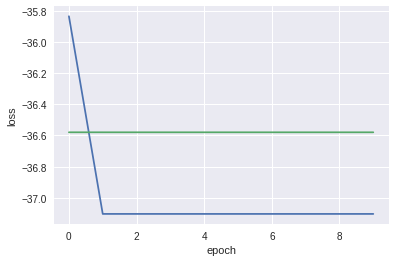

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

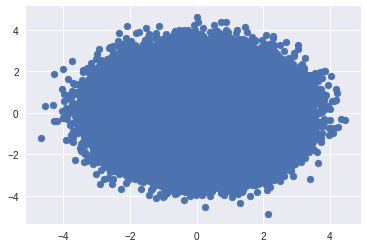

In [0]:
enc = encoder.predict(x_train)
plt.scatter(enc[2][:,0], enc[2][:,1])
plt.show()

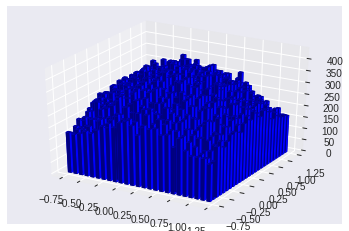

In [0]:
#%matplotlib notebook
%matplotlib inline

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#import matplotlib.pyplot as plt
#import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x, y = np.random.rand(2, 100) * 10
x, y = enc[2][:,0], enc[2][:,1]


hist, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-1, 1], [-1, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.05 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [0]:
tests = x_test.iloc[0:100]
tests.describe()

,NORM_UNI_PRICE,NORM_DEL_PRICE,NORM_DEL_QUANT
count,100.000000,100.000000,100.000000
mean,-0.639925,-0.844245,-0.906154
std,0.223119,0.137926,0.159035
min,-0.897904,-0.971282,-1.000000
25%,-0.782912,-0.912118,-1.000000
50%,-0.672434,-0.883293,-1.000000
75%,-0.563031,-0.837676,-0.846154
max,0.414078,-0.202400,-0.384615


In [0]:
results = vae.predict(tests)
pd.DataFrame(results).describe()

,0,1,2
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.675063e-09,7.199131e-09,6.524798e-09
std,3.490806e-09,1.583788e-08,1.450109e-08
min,1.750175e-22,9.889535e-23,1.373204e-22
25%,8.531608e-15,7.584477e-15,8.016256e-15
50%,3.025805e-12,2.829503e-12,2.592998e-12
75%,6.585846e-10,3.136226e-09,3.117338e-09
max,1.437760e-08,6.992027e-08,6.409358e-08
